# Information
The information of event $e$ can be defined by:
$$I(p_e) = \log\left(\frac{1}{p_e}\right) = -\log(p_e)$$

where $p$ is a probability of the event $e$.

**Note**: $I(p_i = 0)$ is undefined.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

For a random variable $X$ corresponding to toss of a fair coin:
$$\begin{align}
P(X = H) &= p\\
P(X = T) &= 1-p\\
\end{align}$$

In [2]:
p_H = np.linspace(0.001, 0.999, 100) # define probabilities of evnets H
p_T = 1 - p_H                        # define probabilities of evnets T
I = lambda p: -np.log2(p)             # define the Information function I

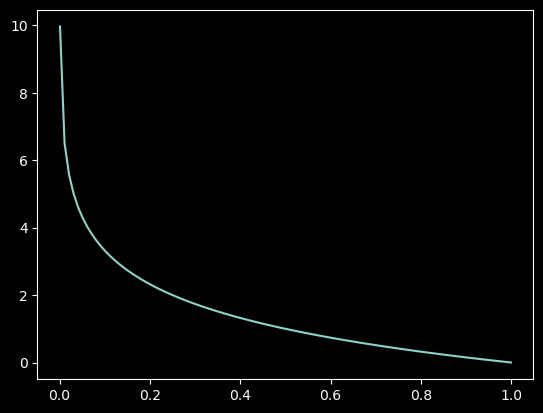

In [3]:
plt.plot(p_H, I(p_H)); # plot information of the H event

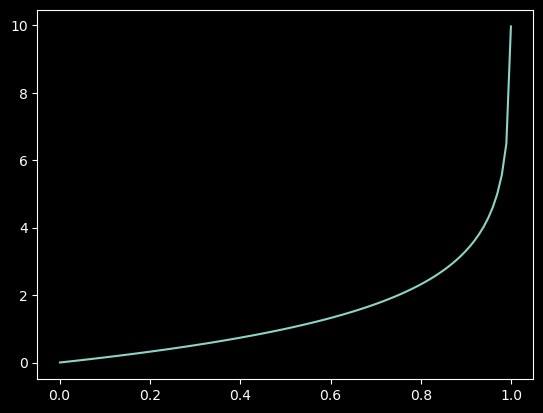

In [4]:
plt.plot(p_H, I(p_T)); # plot information of the H event

## Information of events

We can define information for more one evnet by:
$$I(p_i, p_j) = I(p_i) + I(p_j)$$
where events $i$ and $j$ are independent 

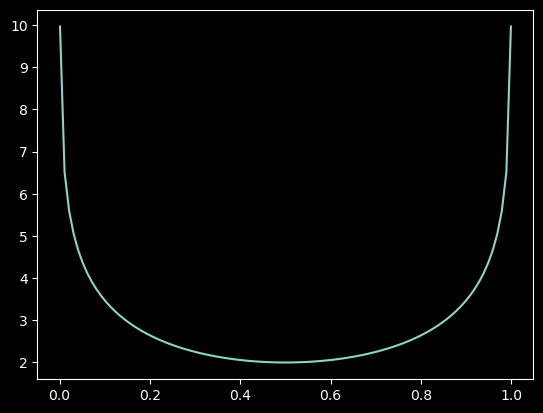

In [5]:
plt.plot(p_H, I(p_H) + I(p_T)); # plot information of the H and T events

## Entropy
The entropy is the expected value of the information of $X$

$$\begin{align}
\mathbb{H}(X) &= \mathbb{E}[I(X)]\\
&= \sum_{i=1}^n P(x_i)I(x_i)\\
&= \sum_{i=1}^n p_i \log\left(\frac{1}{p_i}\right)\\
&= -\sum_{i=1}^n p_i \log(p_i)\\
\end{align}$$

In [6]:
H = p_H * I(p_H) + p_T * I(p_T)

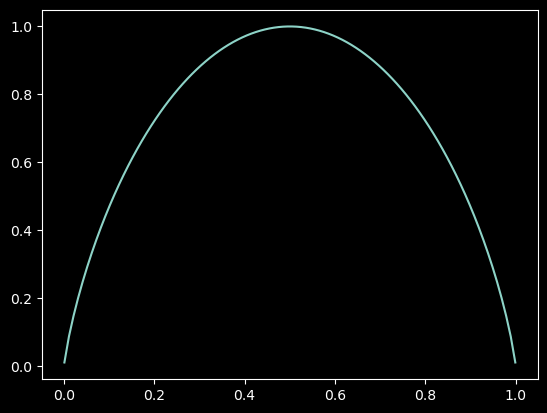

In [7]:
plt.plot(p_H, H);

In [8]:
from numpy import exp
from scipy.optimize import newton

In [11]:
X = np.random.choice([1, 2, 3, 4, 5, 6], size=1000, p = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]) # 

In [12]:
a, b, B = 1, 6, X.mean()

# Equation 15
def z(lamb):
    return 1. / sum(exp(-k*lamb) for k in range(a, b + 1))

# Equation 16
def f(lamb, B=B):
    y = sum(k * exp(-k*lamb) for k in range(a, b + 1))
    return y * z(lamb) - B

# Equation 17
def p(k, lamb):
    return z(lamb) * exp(-k * lamb)

lamb = newton(f, x0=0.5)
print("Lambda = %.4f" % lamb)
for k in range(a, b + 1):
    print("p_%d = %.4f" % (k, p(k, lamb)))

Lambda = -0.3728
p_1 = 0.0540
p_2 = 0.0784
p_3 = 0.1139
p_4 = 0.1653
p_5 = 0.2400
p_6 = 0.3484
